In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, FontManager, Sbopen

In [11]:
### Import class of SofaScore
import sys
sys.path.append('../')
from classes.sofaScore import sofaScore

In [12]:
dataSofa = sofaScore()

In [13]:
## Grab match
url_match = 'https://www.sofascore.com/paraguay-venezuela/xUbsOVb#11518413'
data_match = dataSofa.get_match(url_match)

11518413


In [20]:
data_match.to_csv('sample_match.csv', index=False)

In [14]:
shots = data_match['Shotmap']

In [15]:
shots

,player,shortName,shotType,isHome,bodyPart,xG,minute,addedTime,position,x_start,y_start,x_block,y_block,x_end,y_end,x_goal,y_goal
0,Samuel Sosa,S. Sosa,save,True,left-foot,<NA>,4,<NA>,M,73.2,25.5,53.1,1.9,49.9,0,49.9,95.6
1,Miguel Almirón,M. Almirón,miss,False,left-foot,<NA>,9,<NA>,F,60.2,1.4,48.4,20.5,56.6,0,56.6,97.2
2,Miguel Almirón,M. Almirón,block,False,left-foot,<NA>,12,<NA>,F,48.4,22.6,55.8,5.9,48.1,0,48.1,81.0
3,Salomón Rondón,S. Rondón,block,True,right-foot,<NA>,18,<NA>,F,56.5,6.7,66.1,7.5,50.3,0,50.3,81.0
4,Alexander González,A. González,block,True,right-foot,<NA>,18,<NA>,D,68.4,8.7,43.5,11.5,51.8,0,51.8,81.0
5,Miguel Navarro,M. Navarro,miss,True,left-foot,<NA>,23,<NA>,D,35.9,17.9,48.2,1.2,61.7,0,61.7,98.6
6,Fabián Balbuena,Fabián Balbuena,save,False,head,<NA>,28,<NA>,D,45.2,7.0,49.8,1.2,49.9,0,49.9,84.2
7,Yangel Herrera,Y. Herrera,save,True,head,<NA>,37,<NA>,M,53.0,9.0,43.3,5.7,49.1,0,49.1,74.7
8,Samuel Sosa,S. Sosa,miss,True,left-foot,<NA>,37,<NA>,M,31.3,23.5,52.5,1.2,41.7,0,41.7,98.6
9,Miguel Almirón,M. Almirón,miss,False,left-foot,<NA>,45,2,F,35.7,12.7,39.0,16.3,49.2,0,49.2,33.3


## Image wanted

In [17]:
#### Home team
home_shots = shots[shots['isHome'] == True]
away_shots = shots[shots['isHome'] != True]

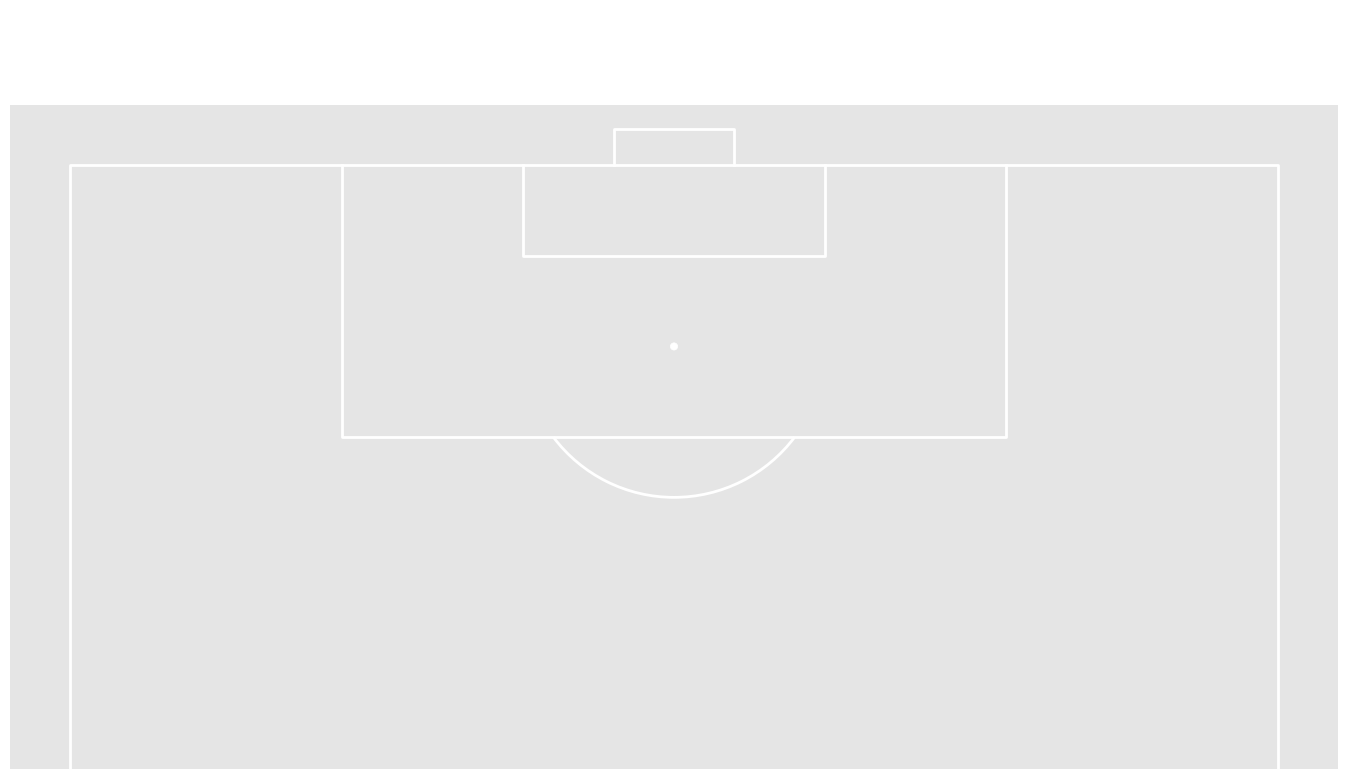

In [19]:
## Styles
plt.style.use('ggplot')

## Setup the pitch
pitch = VerticalPitch(half=True, goal_type='box', pad_bottom=-20)
fig, axs = pitch.grid(figheight=8, endnote_height=0, title_height=0.1, title_space=0.02, axis=False, grid_height=0.83)